### Evolving Network Analysis - January 2018
#### <i>Abdel K. Bokharouss, Joris Rombouts, Bart van Helvert, Remco Surtel</i>

### <font color = "green">imports and preparation</font>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import datetime
import tkinter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
with open("./data/tgraph_real_wikiedithyperlinks.txt") as file:
    peek = file.readlines()[:10]
peek

['1 6 1028243088 1120917090\n',
 '1 8 1029885647 1136791625\n',
 '1 9 1029885647 1136791625\n',
 '1 3 1028243088 1143227562\n',
 '1 3 1146727453 1148998304\n',
 '1 5 1028243088 1184096745\n',
 '1 2 1028243088 1184096745\n',
 '1 3 1149598035 1184096745\n',
 '1 4 1028243088 1184096745\n',
 '1 7 1028243088 1184096745\n']

In [3]:
temp_nw = pd.read_table("./data/tgraph_real_wikiedithyperlinks.txt", header = None, sep = " ",
                       names = ["src", "trg", "start", "end"])

In [4]:
temp_nw.head()

,src,trg,start,end
0,1,6,1028243088,1120917090
1,1,8,1029885647,1136791625
2,1,9,1029885647,1136791625
3,1,3,1028243088,1143227562
4,1,3,1146727453,1148998304


In [5]:
temp_nw['start'] = pd.to_datetime(temp_nw['start'], unit = 's') #convert Unix timestamps to date time, utc = 0
temp_nw['end'] = pd.to_datetime(temp_nw['end'], unit = 's')

In [6]:
temp_nw.head(10)

,src,trg,start,end
0,1,6,2002-08-01 23:04:48,2005-07-09 13:51:30
1,1,8,2002-08-20 23:20:47,2006-01-09 07:27:05
2,1,9,2002-08-20 23:20:47,2006-01-09 07:27:05
3,1,3,2002-08-01 23:04:48,2006-03-24 19:12:42
4,1,3,2006-05-04 07:24:13,2006-05-30 14:11:44
5,1,5,2002-08-01 23:04:48,2007-07-10 19:45:45
6,1,2,2002-08-01 23:04:48,2007-07-10 19:45:45
7,1,3,2006-06-06 12:47:15,2007-07-10 19:45:45
8,1,4,2002-08-01 23:04:48,2007-07-10 19:45:45
9,1,7,2002-08-01 23:04:48,2007-07-10 19:45:45


In [7]:
print(
    datetime.datetime.fromtimestamp(
        int("1028243088")
    ).strftime('%Y-%m-%d %H:%M:%S')
)

2002-08-02 01:04:48


In [8]:
static_nw = temp_nw.copy()
static_nw.drop(['start', 'end'], axis = 1, inplace = True)
static_nw.head()

,src,trg
0,1,6
1,1,8
2,1,9
3,1,3
4,1,3


## Static Network Analysis

In this analysis we ignore the time information of each edge. Therefore, we first create a graph $G_{static}$, based only on the pairs of source node and target node. In this paragraph we treat two measures: clustering coefficient and the largest connected component (LCC) which are measures that are very closely related to each other. When analyzing connectedness and clustering ask ourselves how integrated or fractured the overall network is. We look at how these  major subsystems are distributed out and their local characteristics. A graph is connected if for any node in the graph there is a path to any other node. When a graph is not connected, there will be a number of components to it. A component is a subset of nodes and edges within a that are fully connected. First, we will look at the clusters of this particular network. 

### Clustering coefficient
A cluster is simply a subset of nodes and edges in a graph that posses a certain common characteristics or relate to each other in a particular manner.  So a component is simply referring ot whether a given set of nodes are all connected or not. A cluster is referring to how they are connected and how much they are connected. This is value is measured as the clustering coefficient of a node. We take a node and look at how connected a node that it links to is to other nodes that it also connceted to. In terms of social network, we asking how many of your friends know your other friends. The more your friends are interconnected, the more clustered the subset is to be. 

The clustering coefficient captures the ratio of existing links connecting a nodes neighbors to each other relative to the maximum possible number of links that could exist between them. 

The clustering coefficient is trying to capture cliquishness. In other words, the clustering coefficient of a node in a graph quentifies how close its neighbours are to be being a clique. Let $G = (V,E)$ a graph. A clique is a subset of nodes of a graph such that every two distinct nodes in the clique are adjacent. More formal: a clique is a subset $C \subseteq V$ such that $(u,v)$ in $E$ for all pairs $u,v$ in $C$.  In fact, a clique is a complete sub-graph, which means that in a clique, each node has a direct link with each other node.

The clustering coefficient represents the fraction of possible interconnectors between the neighbors of a node $u$. The clustering coefficient is a value between zero and one. The coefficient equals zero, if $u$ is the centere of a "star", where his neighbors are not connected to eachother. When the clustering coefficient is one, we have a clique. This means that $u$ is connected to its neighbors, and all its neighbors are connected to each other. 

For unweighted undirected graphs, the clustering of a node $u$ is:

$$c_u = \frac{2 \cdot N_u}{k_u (k_u - 1)}$$, 

where $k_u$ is the degree of node $u$ and $N_u$ is the number of links between the neighbors of $u$. 
Note that in this measure we will read and create a static graph $G_static$ as an undirected graph. The clustering coefficient that we calculate is just two times the clustering coeffecient for each node times two. This is because in an undirected graph, a directed edge is considered as two directed edges, one from the node to another node and one node the other way around. First, we open the graph as an undirected graph.

In [9]:
#np.savetxt(r'./data/tgraph_real_wikiedithyperlinks_NoTime.txt', static_nw.values, fmt='%d')

In [10]:
fh = open("data/tgraph_real_wikiedithyperlinks_NoTime.txt", 'rb')
G_static = nx.read_edgelist(fh,create_using=nx.Graph())
fh.close()

In [11]:
#G_static = nx.from_pandas_dataframe(static_nw, 'src', 'trg')

The <i>NetworkX</i> library is used for calculating the cluster coefficient for each node. After that we store the results of each node in a dataframe, which is later saved as a csv file, to prevent that we have to run this time-consuming processing again.  

In [12]:
#cluster_score = nx.clustering(G_static)

In [13]:
#df_cluster_score = pd.DataFrame(list(cluster_score.items()), columns=['Node', 'Cluster Coefficient'])
df_cluster_score = pd.read_csv('data/cluster_score.csv')

In [14]:
df_cluster_score.sort_values(by=['Cluster Coefficient'], inplace = True, ascending = False)
df_cluster_score.head()

,Node,Cluster Coefficient
233690,153477,1.0
644700,977681,1.0
131774,312446,1.0
580493,899623,1.0
580484,899605,1.0


The most interesting values of the clustering coefficient are $0$ and $1$, i.e. the nodes that have neighbor nodes who are entirely not connected to each other and nodes that have neighbor nodes who are entirely connected. First, we count the nodes who have a cluster coefficient of $1$.

In [15]:
df_cluster_score.loc[df_cluster_score['Cluster Coefficient'] == 1.0].count()#number of nodes with coefficient of 1, i.e. that are a clique

Node                   28638
Cluster Coefficient    28638
dtype: int64

We see that $\frac{28638}{678907} \cdot 100 \text{%} = 4.2$% of the nodes have a cluster coefficient of $1$. So only $4.2$% of the nodes have adjacent nodes that have link between themzelves, in other words, are a clique. In terms of a (social) network this means that these are group of articles all of whom have a link to each other. We can also imagine that in such a large network there are many group of articles all of whom have no link to each other. In the following cell we calculate this number of articles by counting the rows with a value of $0$ for `Cluster Coefficient`.

In [22]:
df_cluster_score.loc[df_cluster_score['Cluster Coefficient'] == 0.0].count()#number of nodes with coefficient of 0, i.e. nodes that are connected to no other (neighbor) nodes

Node                   389677
Cluster Coefficient    389677
dtype: int64

As one can see, $\frac{389677}{678907} \cdot 100 \text{%} = 57$% of the nodes  have no links between the neighbor nodes themselves. This means that more than half of the nodes have neighbor nodes who have no link between them. So these nodes can be considered as the centre of a "star". This means that articles that are linked to the wiki page are in most of the time articles that give some additional information to the wiki page, information that was not on other articles already linked to the wiki page. 

In [16]:
#df_cluster_score.to_csv('data/cluster_score.csv')

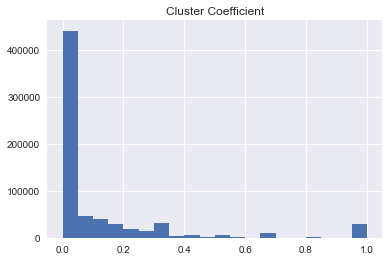

In [17]:
df_cluster_score.hist(column='Cluster Coefficient', bins = 20);
plt.show()

Note that the clustering coefficient of a graph is just the average of the clustering coefficient of all nodes. 
<font color="red">todo: add clustering coefficient distribution http://konect.uni-koblenz.de/plots/cluscod --> cumulative plot !</font>

In [36]:
base = np.histogram(df_cluster_score['Cluster Coefficient'], bins = 20)

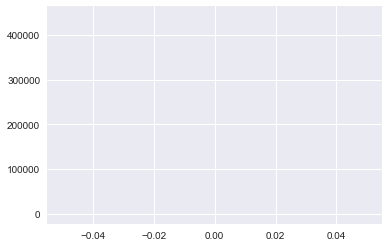

In [40]:
plt.plot(base[:-1], c="green");
plt.show()

In [18]:
#nx.average_clustering(G_static)

### Largest connected component (LCC)

The number of components says something about how a network is fractioned. Before we check for the largest connected component, we first check how many connected components there are in this network. 

In [29]:
number_of_connected_components = nx.number_connected_components(G_static)
number_of_connected_components

6324

In [33]:
list(nx.connected_component_subgraphs(G_static))

KeyboardInterrupt: 

In [19]:
#G_bfs = nx.bfs_tree(G_static, 1)

In [20]:
#nx.draw(G_bfs)
#nx.draw(G_bfs,pos=nx.spring_layout(G))
#plt.show()